In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy import stats
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# Цели и задачи проекта

In [ ]:
Первичная обработка данных.

Проверим какие данные хранятся в файле

In [2]:
display(stud.head())
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

In [4]:
stud = stud.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu',
                            'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob', 'address': 'adres'})
stud.columns

Index(['school', 'sex', 'age', 'adres', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [5]:
categorical_columns = [c for c in stud.columns if stud[c].dtype.name == 'object']
print (categorical_columns)

['school', 'sex', 'adres', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [6]:
stud[categorical_columns].describe()

,school,sex,adres,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [7]:
bin_columns = [c for c in categorical_columns if stud[c].nunique() == 2]
for c in bin_columns:
    if stud[c].value_counts().max()/stud[c].count() >= 0.9:
        print("Один из частот больше 90% у признака (столбца): {}".format(c))

Один из частот больше 90% у признака (столбца): higher


In [8]:
stud.drop(['higher'], inplace = True, axis=1)

In [9]:
categorical_columns = [c for c in stud.columns if stud[c].dtype.name == 'object']

In [10]:
# Печать полного переченья категориальных признаков:
for c in categorical_columns:
    print (c, '  ', stud[c].unique())

school    ['GP' 'MS']
sex    ['F' 'M']
adres    ['U' nan 'R']
famsize    [nan 'GT3' 'LE3']
pstatus    ['A' nan 'T']
mjob    ['at_home' 'health' 'other' 'services' 'teacher' nan]
fjob    ['teacher' 'other' nan 'health' 'services' 'at_home']
reason    ['course' 'other' 'home' 'reputation' nan]
guardian    ['mother' 'father' 'other' nan]
schoolsup    ['yes' 'no' nan]
famsup    ['no' 'yes' nan]
paid    ['no' nan 'yes']
activities    ['no' 'yes' nan]
nursery    ['yes' 'no' nan]
internet    [nan 'yes' 'no']
romantic    ['no' nan 'yes']


In [11]:
for col in  categorical_columns:
    print(stud['score'].groupby(stud[col]).sum(), '\n')

school
GP    18105.0
MS     2225.0
Name: score, dtype: float64 

sex
F    10220.0
M    10110.0
Name: score, dtype: float64 

adres
R     3895.0
U    15590.0
Name: score, dtype: float64 

famsize
GT3    13135.0
LE3     5850.0
Name: score, dtype: float64 

pstatus
A     1985.0
T    15925.0
Name: score, dtype: float64 

mjob
at_home     2650.0
health      1940.0
other       6290.0
services    5365.0
teacher     3035.0
Name: score, dtype: float64 

fjob
at_home      830.0
health       835.0
other       9975.0
services    4995.0
teacher     1735.0
Name: score, dtype: float64 

reason
course        6725.0
home          5170.0
other         1900.0
reputation    5675.0
Name: score, dtype: float64 

guardian
father     4595.0
mother    13045.0
other      1095.0
Name: score, dtype: float64 

schoolsup
no     17585.0
yes     2305.0
Name: score, dtype: float64 

famsup
no      7030.0
yes    11170.0
Name: score, dtype: float64 

paid
no     9920.0
yes    8415.0
Name: score, dtype: float64 

activit

In [12]:
numerical_columns   = [c for c in stud.columns if stud[c].dtype.name != 'object']
print(numerical_columns)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [13]:
stud[numerical_columns].describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [14]:
print('Количество пустых значений в столбцах:')
for col in stud.columns:
    print('{}:      {},'.format(col, stud[col].isnull().sum()))

Количество пустых значений в столбцах:
school:      0,
sex:      0,
age:      0,
adres:      17,
famsize:      27,
pstatus:      45,
medu:      3,
fedu:      24,
mjob:      19,
fjob:      36,
reason:      17,
guardian:      31,
traveltime:      28,
studytime:      7,
failures:      22,
schoolsup:      9,
famsup:      39,
paid:      40,
activities:      14,
nursery:      16,
internet:      34,
romantic:      31,
famrel:      27,
freetime:      11,
goout:      8,
health:      15,
absences:      12,
score:      6,


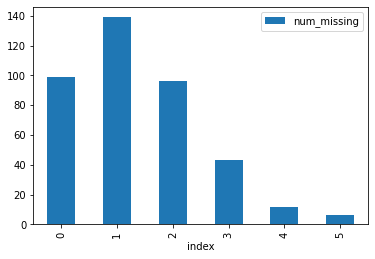

In [15]:
for col in stud.columns:
    missing = stud[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
       # print('creat missing indicator for: {}'.format(col))
        stud['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in stud.columns if 'ismissing' in col]
stud['num_missing'] = stud[ismissing_cols].sum(axis=1)

stud['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing')

In [16]:
stud[stud['num_missing'] >= 5].index

Int64Index([54, 112, 266, 268, 280, 313], dtype='int64')

In [17]:
cols = [col for col in stud.columns if 'missing' in col]
stud.drop(cols, inplace = True, axis=1)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

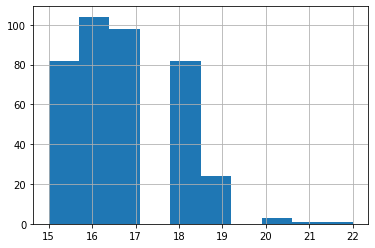

In [18]:
stud.age.hist()
stud.age.describe()

In [19]:
def blowout(col, r1, r2):
    IQR = col.quantile(0.75) - col.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25-1.5*IQR, l=perc75 + 1.5*IQR))

In [20]:
blowout(stud.age, 15, 22)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


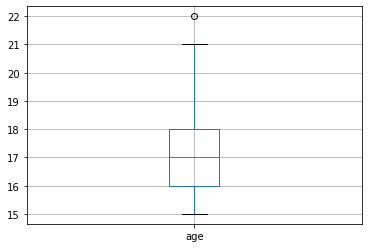

In [21]:
stud.boxplot(column = ['age'])

In [22]:
ind = stud[stud.age>=21].index
print(ind)

Int64Index([247, 392], dtype='int64')


In [23]:
stud.drop(ind, inplace = True, axis = 0)

count    393.000000
mean      16.671756
std        1.231658
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       20.000000
Name: age, dtype: float64

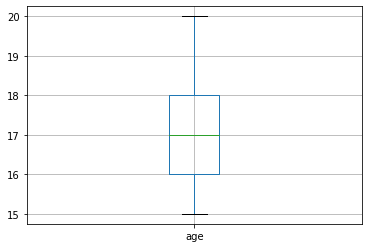

In [24]:
stud.boxplot(column=['age'])
# stud.age.hist()
stud.age.describe()

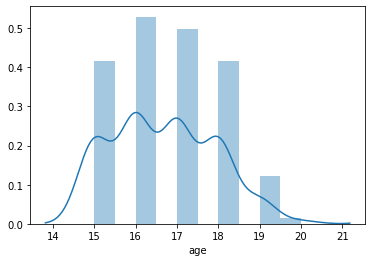

In [25]:
sns.distplot(stud['age'])

count    390.000000
mean       2.753846
std        1.097285
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

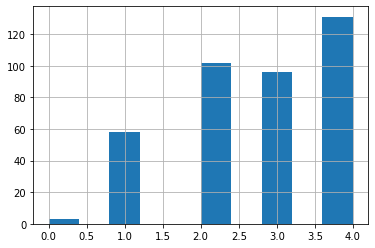

In [26]:
stud.medu.hist()
stud.medu.describe()

count    369.000000
mean       2.623306
std        2.231591
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

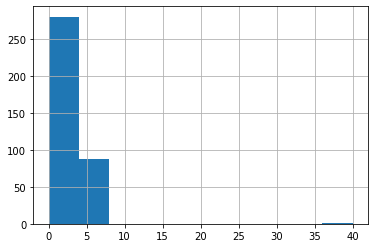

In [27]:
stud.fedu.hist()
stud.fedu.describe()

In [28]:
stud.fedu = stud.fedu.apply(lambda x: 4.0 if x == 40.0 else x)

count    369.000000
mean       2.525745
std        1.085985
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

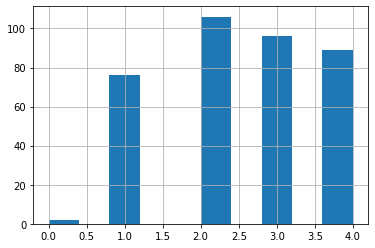

In [29]:
#    Еще раз построим график и напечатаем числовые показатели
stud.fedu.hist()
stud.fedu.describe()

count    386.000000
mean       2.044041
std        0.840920
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

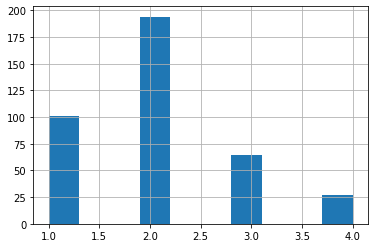

In [30]:
stud.studytime.hist()
stud.studytime.describe()

count    371.000000
mean       0.323450
std        0.718832
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

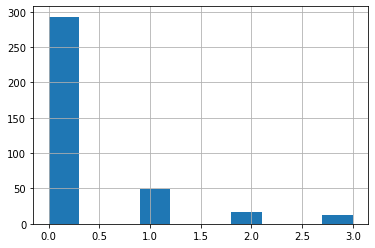

In [31]:
stud.failures.hist()
stud.failures.describe()

count    366.000000
mean       3.931694
std        0.926464
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

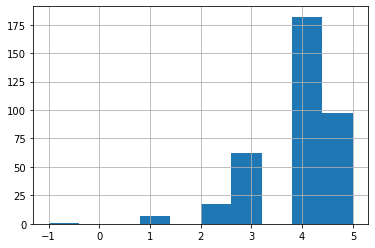

In [32]:
stud.famrel.hist()
stud.famrel.describe()

In [33]:
stud.famrel = stud.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

count    366.000000
mean       3.937158
std        0.902894
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

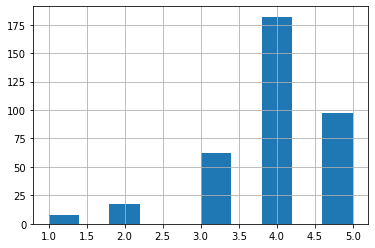

In [34]:
#    Еще раз построим график и печатаем числовых показателей
stud.famrel.hist()
stud.famrel.describe()

count    382.000000
mean       3.225131
std        0.991617
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

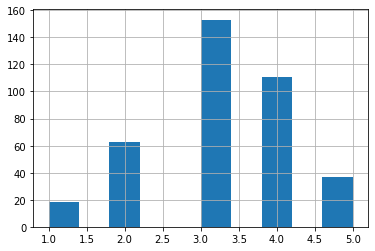

In [35]:
stud.freetime.hist()
stud.freetime.describe()

count    385.000000
mean       3.101299
std        1.114592
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

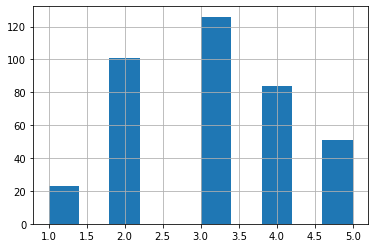

In [36]:
stud.goout.hist()
stud.goout.describe()

count    378.000000
mean       3.539683
std        1.393338
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

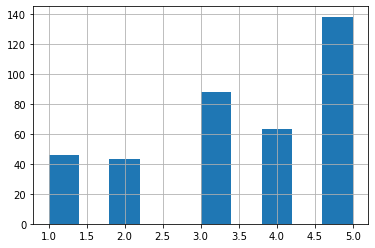

In [37]:
stud.health.hist()
stud.health.describe()

count    381.000000
mean       7.267717
std       23.521585
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

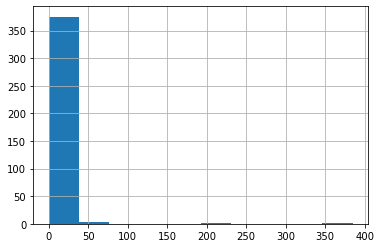

In [38]:
stud.absences.hist()
stud.absences.describe()

In [39]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25-IQR, l=perc75 + 5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-8.0, 48.0].


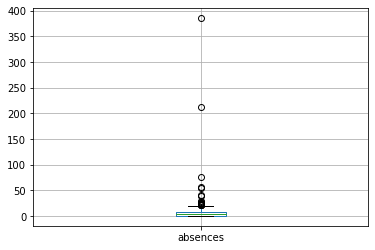

In [40]:
stud.boxplot(column = ['absences'])

In [41]:
ind = stud[stud['absences'] >= 35].index
print(ind)

Int64Index([74, 183, 222, 276, 307, 315, 390], dtype='int64')


In [42]:
stud.drop(ind, inplace=True, axis=0)

count    374.000000
mean       5.104278
std        5.842190
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

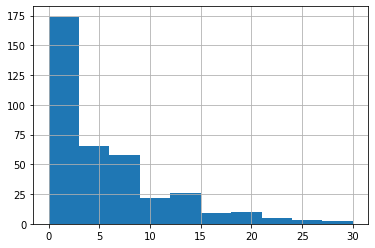

In [43]:
stud.absences.hist()
stud.absences.describe()

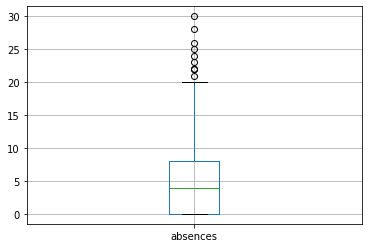

In [44]:
stud.boxplot(column = ['absences'])

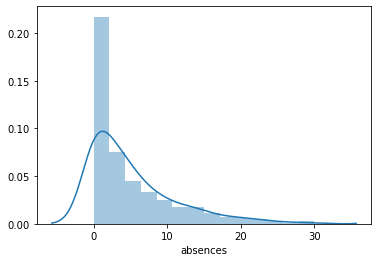

In [45]:
sns.distplot(stud['absences'])

count    380.000000
mean      52.342105
std       23.078707
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

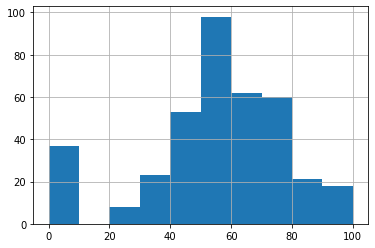

In [46]:
stud.score.hist()
stud.score.describe()

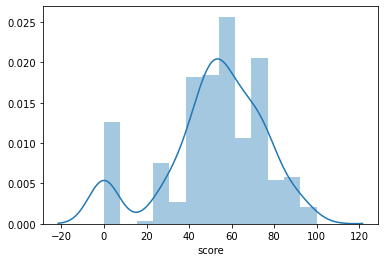

In [47]:
sns.distplot(stud['score'])

# Корреляционный анализ

In [48]:
# Сначала рассмотрим связи между числовыми столбцами
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159474,-0.148871,0.101297,0.010079,0.145846,0.032838,0.011388,0.124877,-0.048869,0.139564,-0.145100
medu,-0.159474,1.000000,0.627198,-0.184260,0.080948,-0.242431,-0.012994,0.034316,0.059218,-0.048655,0.111382,0.217271
fedu,-0.148871,0.627198,1.000000,-0.152645,0.006812,-0.260225,-0.014733,-0.012902,0.049487,0.018059,0.027713,0.127572
traveltime,0.101297,-0.184260,-0.152645,1.000000,-0.103529,0.085150,-0.016925,-0.013830,0.039514,-0.031108,-0.014393,-0.070368
studytime,0.010079,0.080948,0.006812,-0.103529,1.000000,-0.162825,0.048762,-0.111014,-0.041889,-0.086782,-0.086127,0.111022
failures,0.145846,-0.242431,-0.260225,0.085150,-0.162825,1.000000,-0.045781,0.069715,0.102093,0.108049,0.095159,-0.346337
famrel,0.032838,-0.012994,-0.014733,-0.016925,0.048762,-0.045781,1.000000,0.163565,0.059937,0.098492,-0.103034,0.072232
freetime,0.011388,0.034316,-0.012902,-0.013830,-0.111014,0.069715,0.163565,1.000000,0.282731,0.071064,0.024479,0.024931
goout,0.124877,0.059218,0.049487,0.039514,-0.041889,0.102093,0.059937,0.282731,1.000000,-0.006848,0.112518,-0.122557
health,-0.048869,-0.048655,0.018059,-0.031108,-0.086782,0.108049,0.098492,0.071064,-0.006848,1.000000,-0.036087,-0.074911


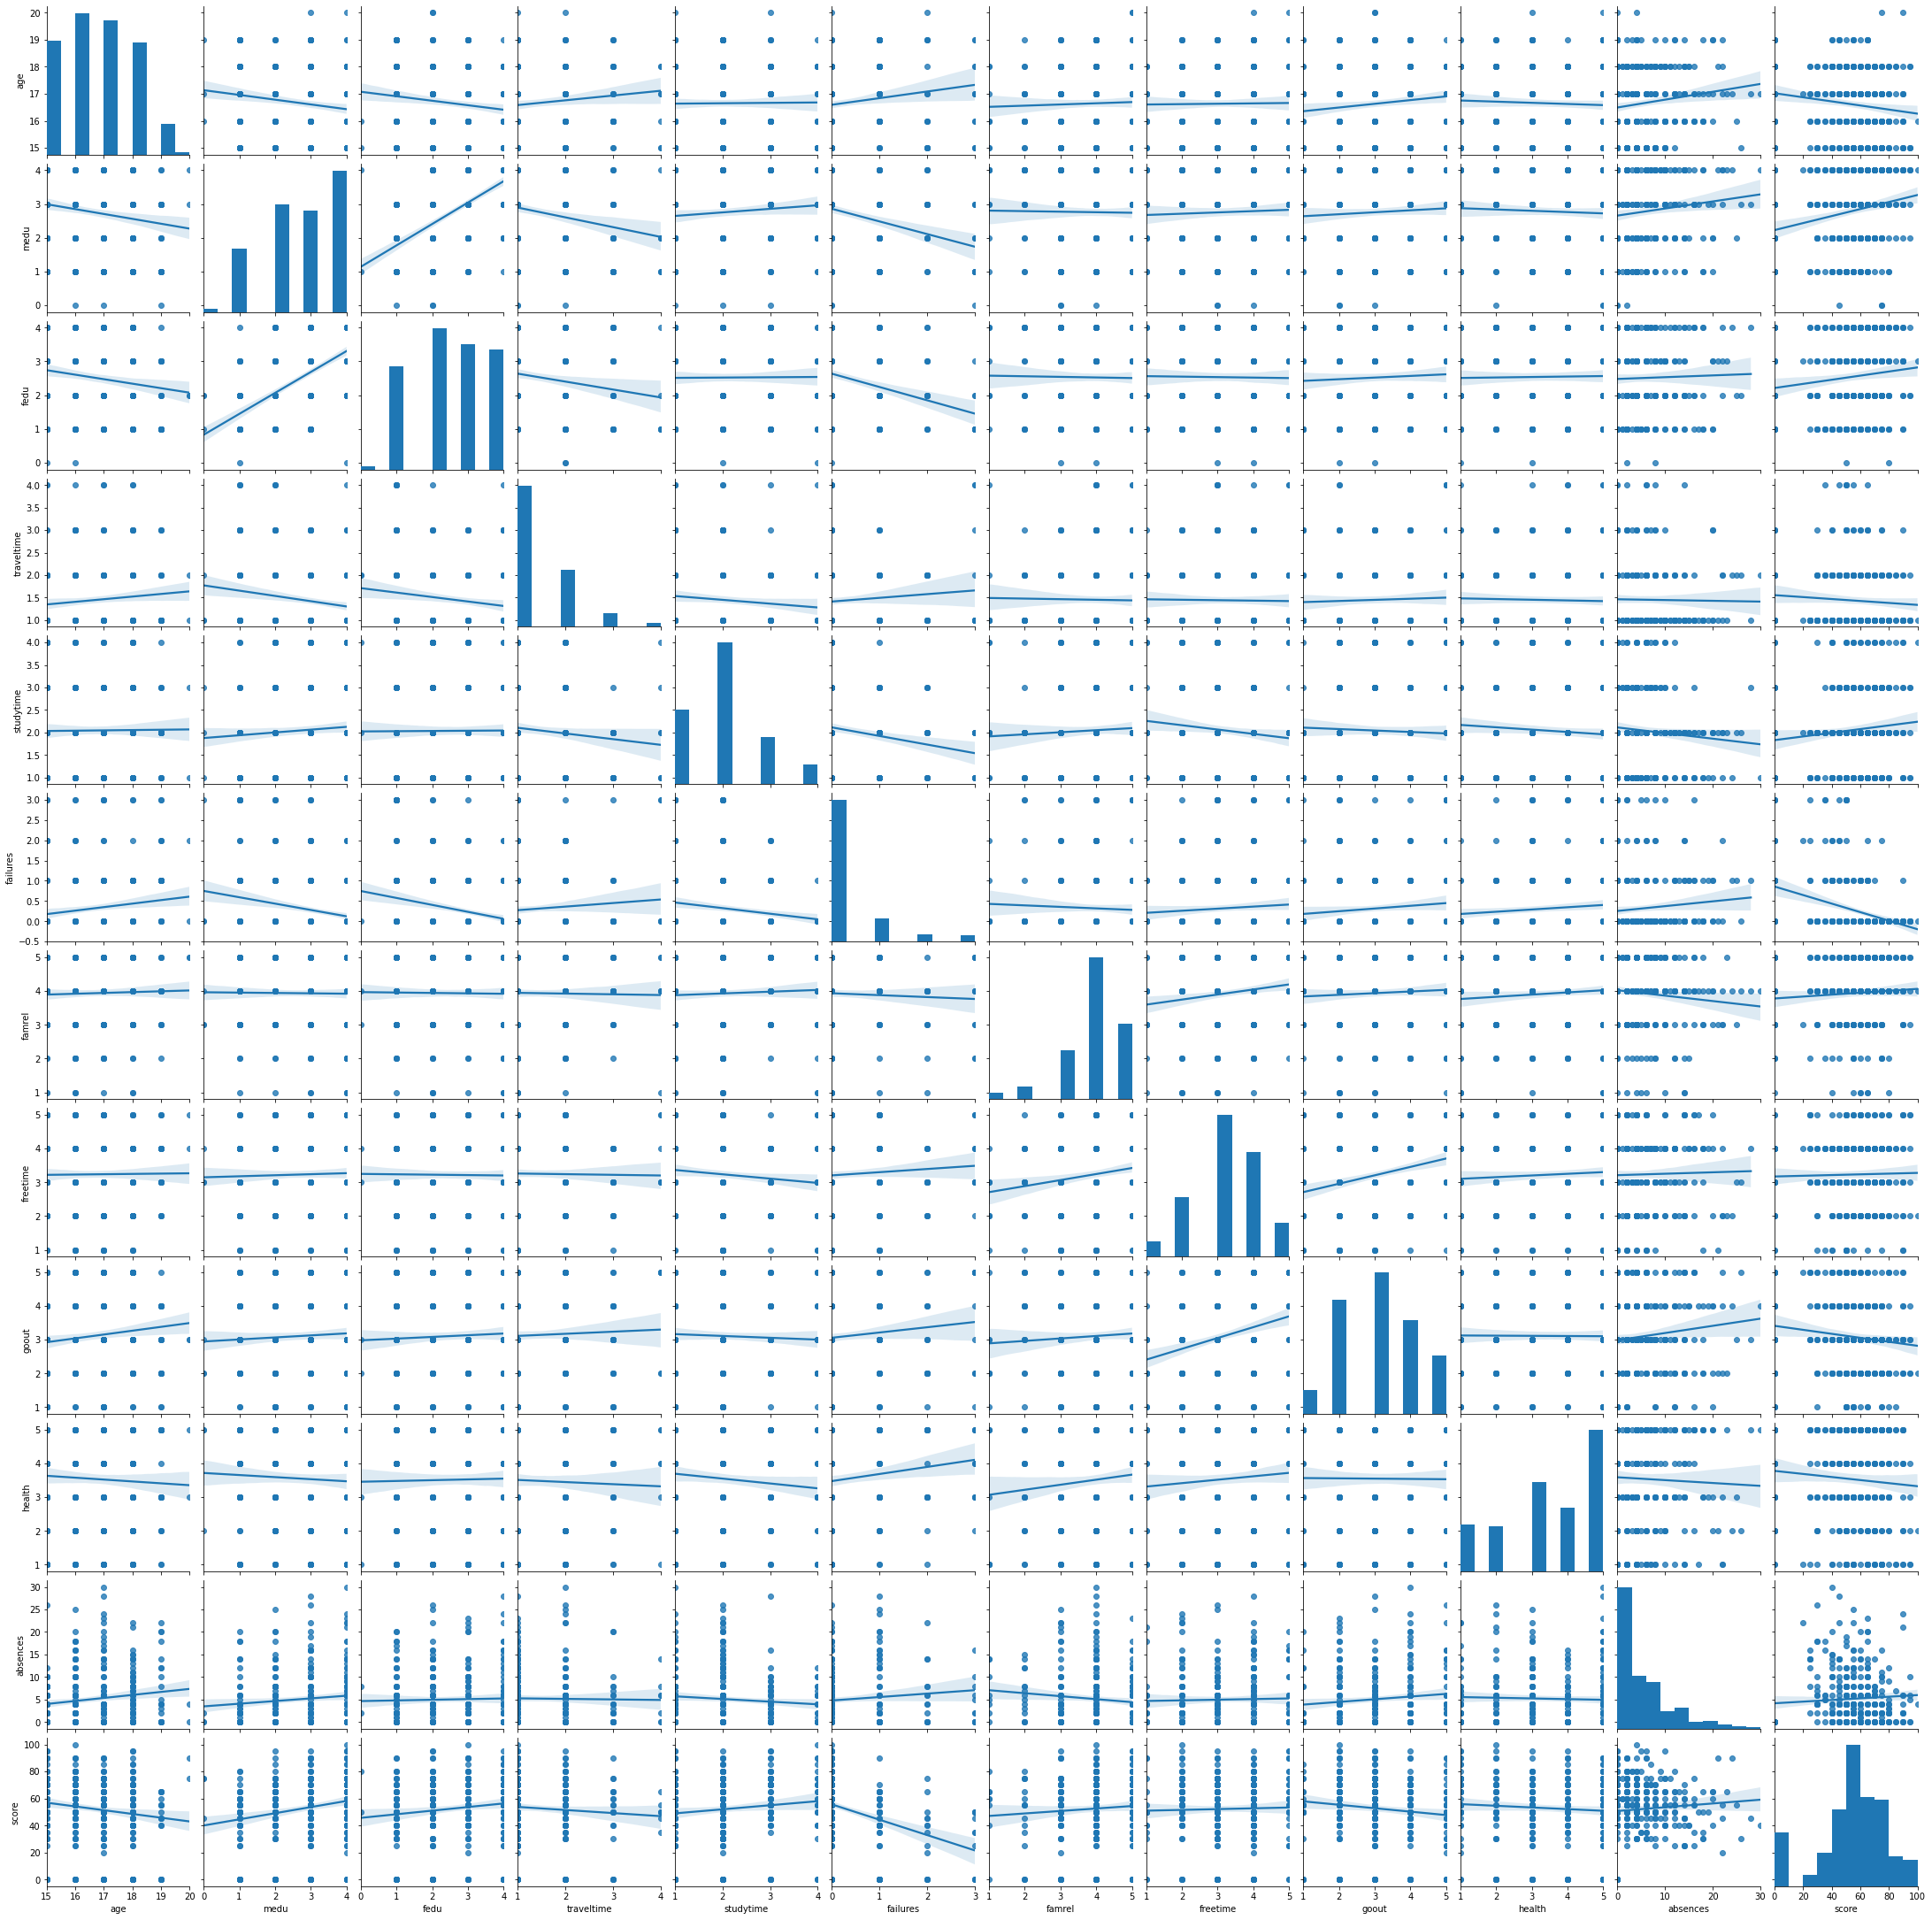

In [49]:
sns.pairplot(stud,kind = 'reg')

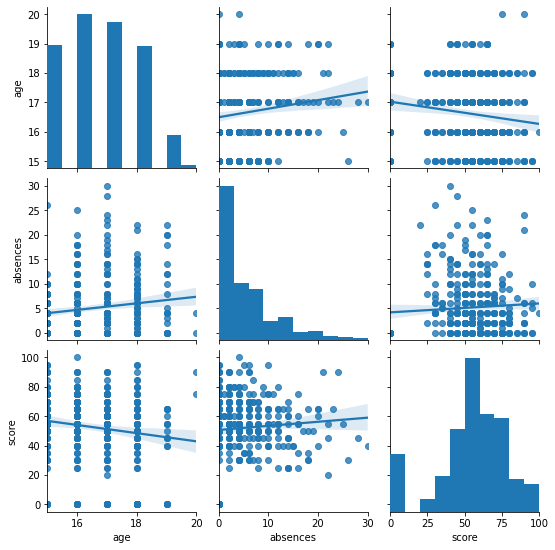

In [50]:
sns.pairplot(stud, x_vars = ['age','absences', 'score'], y_vars = ['age', 'absences','score'],kind = 'reg')

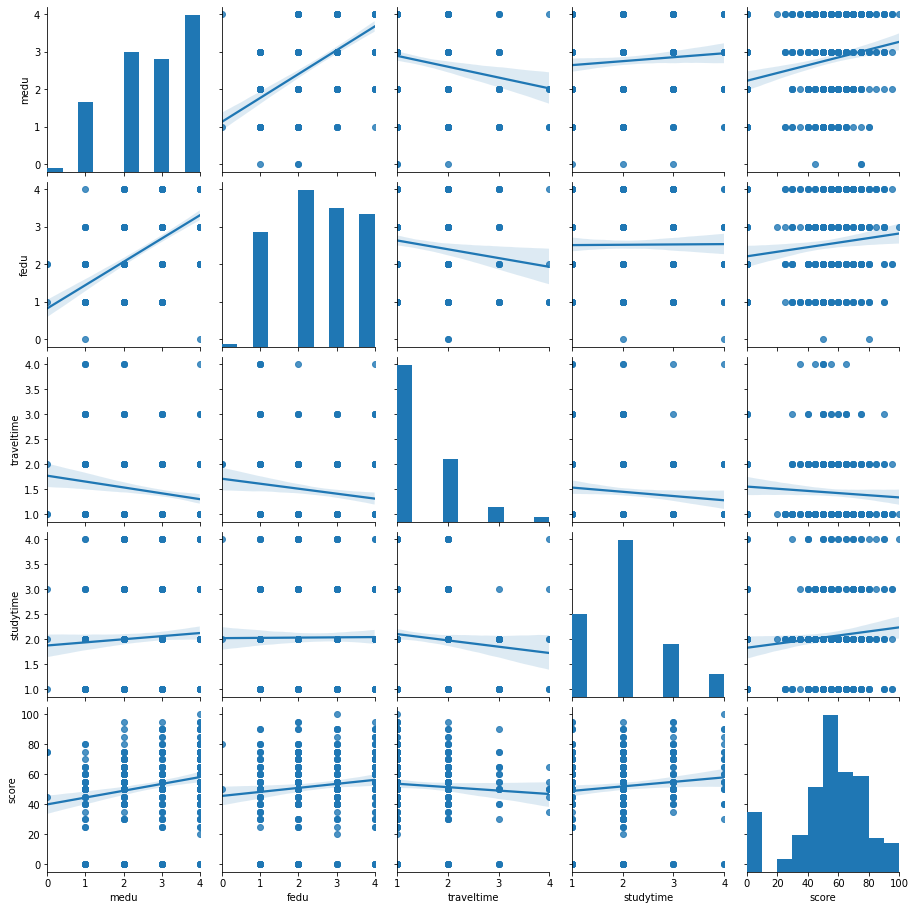

In [51]:
sns.pairplot(stud, x_vars = ['medu', 'fedu', 'traveltime', 'studytime', 'score'], y_vars = ['medu', 'fedu', 'traveltime', 'studytime', 'score'], kind = 'reg')

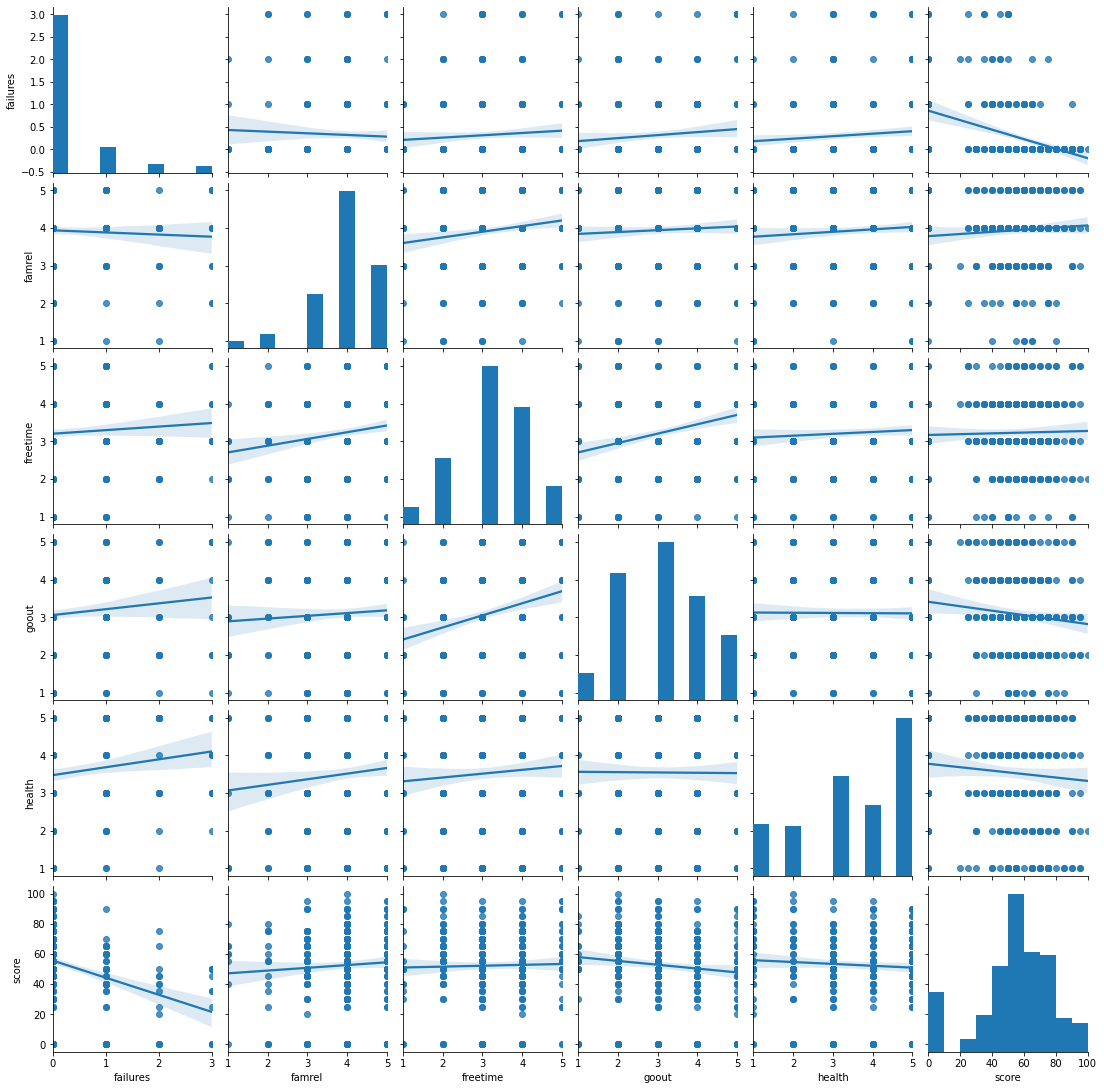

In [52]:
sns.pairplot(stud, x_vars = ['failures', 'famrel', 'freetime', 'goout', 'health', 'score'], y_vars = ['failures', 'famrel', 'freetime', 'goout', 'health', 'score'], kind = 'reg') 

# Анализ номинативных переменных

In [53]:
def calc_chi2(comb, p):
    df_tab = stud.groupby([comb[0], comb[1]]).score.sum().reset_index()
    contingency_tab = df_tab.pivot(
        index=comb[0], columns=comb[1], values='score')
    prizn = True
    for col in contingency_tab:
        if (contingency_tab[col].isnull().any() or contingency_tab[col].min() == 0.0):
            # print(comb, 'В столбце {} есть поле NaN  или 0,0'.format(col))
            prizn = False
            break

    if prizn:
        chi2, p_value, dof, exp = chi2_contingency(
            contingency_tab, correction=False)
        if p_value <= p:                     # p_value МЕНЬШЕ чем 0,05
            print(comb, '  chi2 = {:.12f} ; '.format(
                chi2**0.5), '    p_value = {:.12f};'.format(p_value))

In [54]:
cols = [c for c in stud.columns if stud[c].dtype.name == 'object'] 
combinations_all = list(combinations(cols, 2))
for comb in combinations_all:
    calc_chi2(comb, 0.05)

('school', 'sex')   chi2 = 7.682568439810 ;      p_value = 0.000000000000;
('school', 'adres')   chi2 = 37.157373284275 ;      p_value = 0.000000000000;
('school', 'famsize')   chi2 = 12.237224401034 ;      p_value = 0.000000000000;
('school', 'pstatus')   chi2 = 11.726202267329 ;      p_value = 0.000000000000;
('school', 'mjob')   chi2 = 20.294548866957 ;      p_value = 0.000000000000;
('school', 'reason')   chi2 = 25.840193841684 ;      p_value = 0.000000000000;
('school', 'guardian')   chi2 = 8.387762415303 ;      p_value = 0.000000000000;
('school', 'famsup')   chi2 = 22.886369022178 ;      p_value = 0.000000000000;
('school', 'paid')   chi2 = 3.216881169815 ;      p_value = 0.001295922616;
('school', 'activities')   chi2 = 16.999585198495 ;      p_value = 0.000000000000;
('school', 'nursery')   chi2 = 18.569498038368 ;      p_value = 0.000000000000;
('school', 'internet')   chi2 = 9.105926495262 ;      p_value = 0.000000000000;
('school', 'romantic')   chi2 = 15.803702397022 ;    

In [55]:
print (cols)

['school', 'sex', 'adres', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']


In [56]:
display(stud.head())
stud.info()

,school,sex,age,adres,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      386 non-null    object 
 1   sex         386 non-null    object 
 2   age         386 non-null    int64  
 3   adres       369 non-null    object 
 4   famsize     359 non-null    object 
 5   pstatus     343 non-null    object 
 6   medu        383 non-null    float64
 7   fedu        362 non-null    float64
 8   mjob        367 non-null    object 
 9   fjob        350 non-null    object 
 10  reason      369 non-null    object 
 11  guardian    357 non-null    object 
 12  traveltime  358 non-null    float64
 13  studytime   379 non-null    float64
 14  failures    364 non-null    float64
 15  schoolsup   378 non-null    object 
 16  famsup      349 non-null    object 
 17  paid        346 non-null    object 
 18  activities  372 non-null    object 
 19  nursery     370 non-null    o

# Выводы

In [57]:
def calc_chi2(comb, p):
    df_tab = stud.groupby([comb[0], comb[1]]).score.sum().reset_index()
    contingency_tab = df_tab.pivot(
        index=comb[0], columns=comb[1], values='score')
    prizn = True
    for col in contingency_tab:
        if (contingency_tab[col].isnull().any() or contingency_tab[col].min() == 0.0):
            print(comb, 'В столбце {} есть поле NaN  или 0,0'.format(col))
            prizn = False
            break

    if prizn:
        chi2, p_value, dof, exp = chi2_contingency(
            contingency_tab, correction=False)
        if p_value >= p:                             # p_value БОЛЬШЕ чем 0,05
            print(comb, '  chi2 = {:.12f} ; '.format(
                chi2**0.5), '    p_value = {:.12f};'.format(p_value))

In [58]:
combinations_all = list(combinations(cols, 2))
for comb in combinations_all:
    calc_chi2(comb, 0.05)

('school', 'fjob') В столбце health есть поле NaN  или 0,0
('school', 'schoolsup') В столбце yes есть поле NaN  или 0,0
('sex', 'adres')   chi2 = 1.914934415939 ;      p_value = 0.055500868070;
('sex', 'pstatus')   chi2 = 0.351134941936 ;      p_value = 0.725487114968;
('sex', 'nursery')   chi2 = 0.320058555314 ;      p_value = 0.748923942467;
('adres', 'famsize')   chi2 = 1.269199254029 ;      p_value = 0.204370007064;
('adres', 'schoolsup')   chi2 = 0.904482670071 ;      p_value = 0.365739519546;
('adres', 'famsup')   chi2 = 1.350984384261 ;      p_value = 0.176700434995;
('adres', 'paid')   chi2 = 0.401952956223 ;      p_value = 0.687718648461;
('adres', 'romantic')   chi2 = 1.207126182288 ;      p_value = 0.227383553105;
('famsize', 'romantic')   chi2 = 1.001468152489 ;      p_value = 0.316600529581;
('pstatus', 'famsup')   chi2 = 0.541466329681 ;      p_value = 0.588186199304;
('mjob', 'fjob') В столбце at_home есть поле NaN  или 0,0
('mjob', 'guardian') В столбце other есть поле 

In [3]:
#*Комментарий для ментора: оказалось очень сложно анализировать текстовые данные с числовым показателем )) 
# Самым сложным оказалось что питон показал одни связи, эксель - немного другие результаты, а логика подсказывала третий вариант.
# Выбрать было очень тяжело, поэтому я немного путалась в выводах и наверно решила неправильно или выводы сформулировала неправильно, но я очень старалась ))) хоть это и не в счет